In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データ準備

In [2]:
tips = sns.load_dataset("tips")

## jointplot

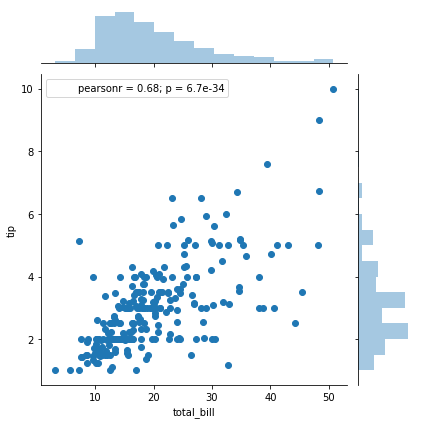

In [10]:
g = sns.jointplot(tips.columns[0], tips.columns[1], tips)

## pairplot

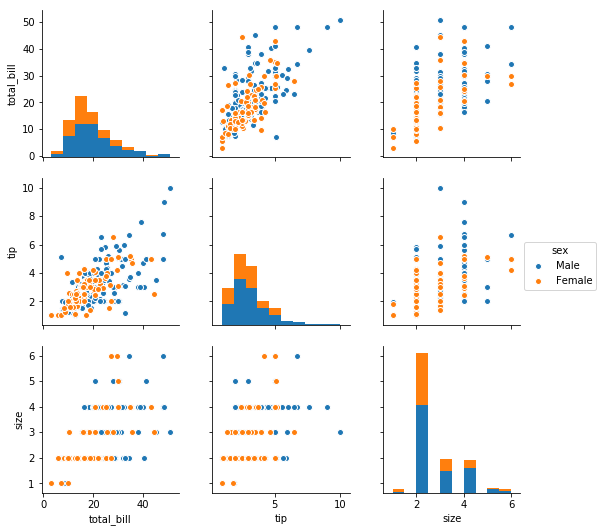

In [11]:
sns.pairplot(tips,hue="sex")

- hueには、層となる情報を入れる（数値以外の情報をよく使っているように見える。）

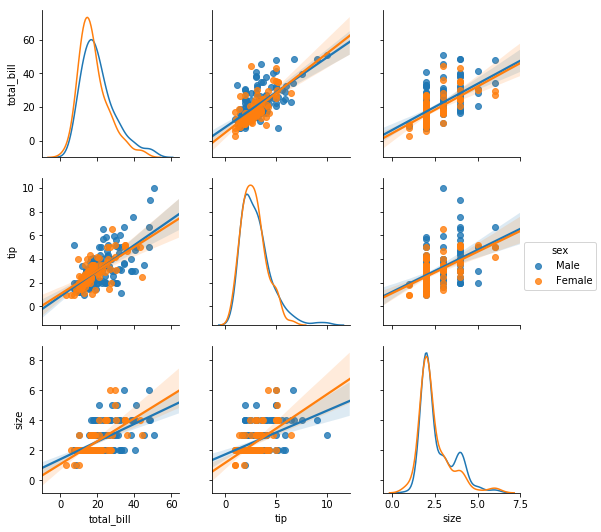

In [12]:
sns.pairplot(tips,hue="sex", kind='reg', diag_kind='kde')

## facetgrid

In [3]:
train_df = pd.read_csv('testdata/train.csv')
test_df = pd.read_csv('testdata/test.csv')

### hist
mapは層だけ。

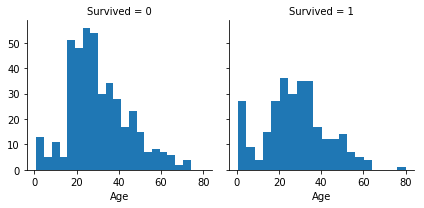

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

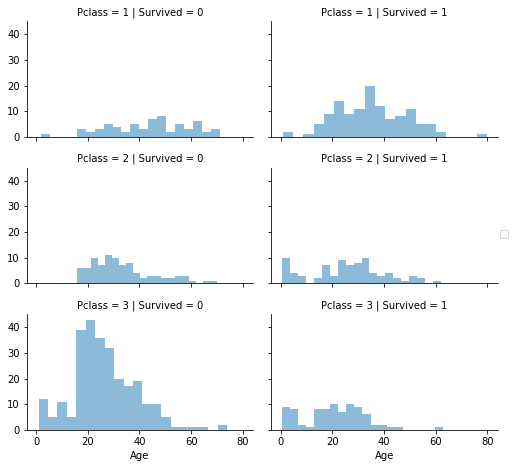

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### pointplot
横軸：mapの1番目の要素
縦軸：mapの2番目の要素
層：mapの3番目の要素

/Users/suzukiry/lab/March/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/suzukiry/lab/March/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


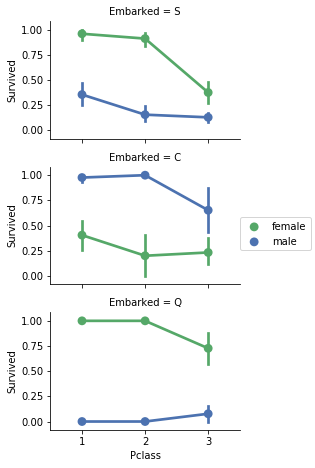

In [28]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
# Pclass: 1,2,3
# Survived: 1,2
# Sex: male, female

# kdeplot

In [4]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

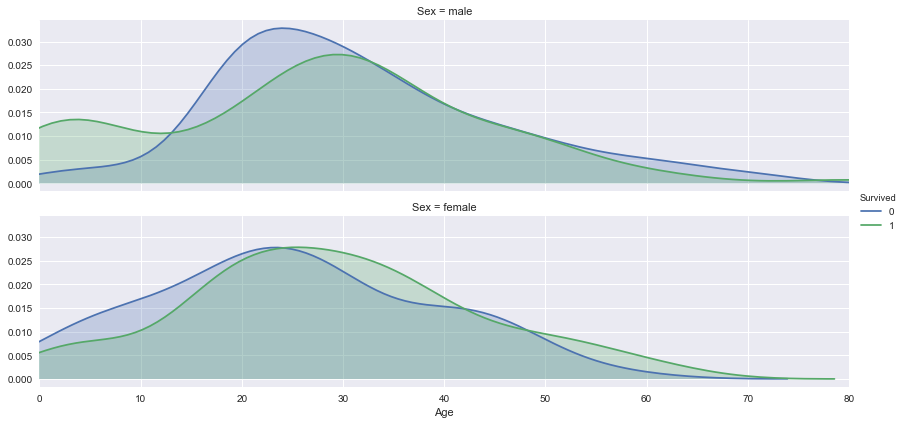

In [5]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( train_df , var = 'Age' , target = 'Survived' , row = 'Sex' )

If the two lines had been about the same, then it would not have been a good variable for our predictive model. 

In [6]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

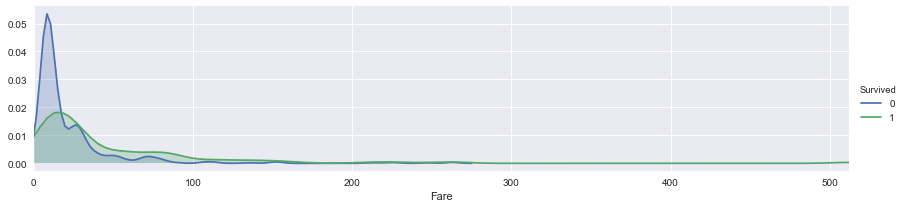

In [8]:
plot_distribution( train_df , "Fare" , "Survived" )

# countplot

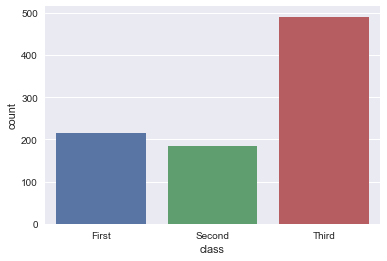

In [6]:
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", data=titanic)

[Ref](http://myenigma.hatenablog.com/entry/2015/10/09/223629)

In [1]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    """
    - Plot distributions of Fare of passangers who survived or did not survive
    plot_distribution( titanic , "Fare" , "Survived" )
    
    """
    # getで辞書からrowまたはcolがあるか、ない場合はNoneにする。
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )

    # 横軸の長さを最大値に合わせる
    facet.set( xlim=( 0 , df[ var ].max() ) ) 
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    """
    - Plot survival rate by Embarked
    plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )
    """
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [6]:
def f(a, b, **kwargs): 
    option1 = kwargs.get('option1', 1)
    option2 = kwargs.get('option2', 2)
    return [option1,option2]

In [8]:
f(1,2, option1=10)

[10, 2]